<a href="https://colab.research.google.com/github/nasa/ASDC_Data_and_User_Services/blob/main/MAIA/NetCDF2csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

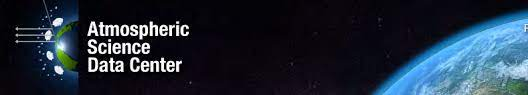\


## NetCDF to CSV Transformation
---








# Overview

This notebook demonstrates an approach to converting a Network Common Data Form (netCDF4) file from the MAIA mission into a Comma Separated Value (CSV) file.

# Outline

- The NetCDF file is opened using nc.Dataset in read mode, and the resulting dataset object is stored in the dataset variable.
- A dictionary called data_dict is created to store the variable data. The read_variables function is called with the dataset object as the input to populate the dictionary with variable data.
- The maximum length among the variable data arrays is determined using a generator expression and the max function.
- Variables with shorter lengths are padded to match the maximum length using np.resize. The updated variable data arrays are stored back in the data_dict dictionary.
- A pandas DataFrame called data is created using the data_dict dictionary, where each variable becomes a column in the DataFrame.
- The DataFrame is saved to a CSV file using the to_csv method of the DataFrame. The index=False argument is used to exclude the row index from being written to the CSV file.

# Setup

Libraries are installed and then imported: 
- `netCDF4` for reading NetCDF files, 
- `pandas` for data manipulation
- `numpy` for array operations.

In [ ]:
!pip install netCDF4 pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.4 MB/s eta 0:00:00


In [ ]:
import netCDF4 as nc
import pandas as pd
import numpy as np

# NetCDF conversion to CSV

In [ ]:
def netcdf_to_csv(input_file, output_file):
    """Main function that performs the conversion from NetCDF to CSV. 
    
    Parameters:
        input_file (the path to the NetCDF file) 
        output_file (the desired path for the output CSV file).
    """
    dataset = nc.Dataset(input_file)  # Open the NetCDF file

    # Get the variable names from the dataset
    variables = dataset.variables.keys()

    # Create a dictionary to store the variable data
    data_dict = {}
    max_length = 0  # Track the maximum length among all variables

    for var in variables:
        var_data = dataset.variables[var][:]

        # Flatten the variable data if it has more than one dimension
        if len(var_data.shape) > 1:
            var_data = var_data.flatten()

        # Update the maximum length if needed
        max_length = max(max_length, var_data.size)

        data_dict[var] = var_data

    # Pad variables with shorter lengths to match the maximum length
    for var in data_dict:
        var_data = data_dict[var]
        if var_data.size < max_length:
            var_data = np.resize(var_data, max_length)
            data_dict[var] = var_data

    # Create a pandas DataFrame using the data dictionary
    data = pd.DataFrame(data_dict)

    # Save the DataFrame to a CSV file
    data.to_csv(output_file, index=False)

    print("Conversion complete.")

# Usage example
input_file = "/content/MAIA_L4_GFPM_20180101T000000Z_FB_NOM_R01_USA-Boston_F01_VSIM01p01p01p01.nc"
output_file = "/content/output.csv"

netcdf_to_csv(input_file, output_file)


Conversion complete.


#NetCDF conversion to CSV with flat groups

In [ ]:
def read_variables(group):
    """
    Recursive function to read variables from a NetCDF group and its subgroups.

    Parameters:
        group
    
    Returns:
        a dictionary containing variable names as keys and their corresponding data arrays as values.
    """
    data_dict = {}

    # Iterate over variables in the current group
    for var in group.variables:
        var_data = group.variables[var][:]

        # Flatten the variable data if it has more than one dimension
        if len(var_data.shape) > 1:
            var_data = var_data.flatten()

        data_dict[var] = var_data

    # Iterate over subgroups in the current group
    for subgroup in group.groups.values():
        subgroup_data = read_variables(subgroup)
        data_dict.update(subgroup_data)

    return data_dict


def netcdf_to_csv(input_file, output_file):
    dataset = nc.Dataset(input_file, "r")  # Open the NetCDF file in read mode

    # Create a dictionary to store the variable data
    data_dict = read_variables(dataset)

    # Find the maximum length among the variable data
    max_length = max(var_data.size for var_data in data_dict.values())

    # Pad variables with shorter lengths to match the maximum length
    for var in data_dict:
        var_data = data_dict[var]
        if var_data.size < max_length:
            var_data = np.resize(var_data, max_length)
            data_dict[var] = var_data

    # Create a pandas DataFrame using the data dictionary
    data = pd.DataFrame(data_dict)

    # Save the DataFrame to a CSV file
    data.to_csv(output_file, index=False)

    print("Conversion complete.")

# Usage example
input_file = "/content/MAIA_L4_GFPM_20180101T000000Z_FB_NOM_R01_USA-Boston_F01_VSIM01p01p01p01.nc"
output_file = "/content/output.csv"

netcdf_to_csv(input_file, output_file)


Conversion complete.


In [ ]:
def read_variables(group):
    """
    Recursive function to read variables from a NetCDF group and its subgroups.
    """
    data_dict = {}

    # Iterate over variables in the current group
    for var in group.variables:
        var_data = group.variables[var][:]

        # Flatten the variable data if it has more than one dimension
        if len(var_data.shape) > 1:
            var_data = var_data.flatten()

        data_dict[var] = var_data

    # Iterate over subgroups in the current group
    for subgroup in group.groups.values():
        subgroup_data = read_variables(subgroup)
        data_dict.update(subgroup_data)

    return data_dict


def netcdf_to_csv(input_file, output_file):
    dataset = nc.Dataset(input_file, "r")  # Open the NetCDF file in read mode

    # Create a dictionary to store the variable data
    data_dict = read_variables(dataset)

    # Find the maximum length among the variable data
    max_length = max(var_data.size for var_data in data_dict.values())

    # Pad variables with shorter lengths to match the maximum length
    for var in data_dict:
        var_data = data_dict[var]
        if var_data.size < max_length:
            var_data = np.resize(var_data, max_length)
            data_dict[var] = var_data

    # Create a pandas DataFrame using the data dictionary
    data = pd.DataFrame(data_dict)

    # Save the DataFrame to a CSV file
    data.to_csv(output_file, index=False)

    print("Conversion complete.")

# Usage example
input_file = "/content/MAIA_L4_GFPM_20180101T000000Z_FB_NOM_R01_USA-Boston_F01_VSIM01p01p01p01.nc"
output_file = "/content/output.csv"

netcdf_to_csv(input_file, output_file)

![output screenshot](https://github.com/nasa/ASDC_Data_and_User_Services/blob/main/images/netcdf-to-csv-excel-screenshot.png)\